TODO: we will layout the objectives and questions first so that the students know what they're working towards. And that the end goal is creating a presentation. Otherwise, only I know what they'll be working towards whereas the students are just blindly completing activities with no tangible end result.


TODO:
when making an exercise where the students plot out number of power outages for different counties on a given day, the baseline they are comparing against is either:
a. the number of power outages that county, averaged across several days earlier in June (when the heatwave wasn't happening but it was still summer)
b. the number given in county_customers_2023 - which gives the total (modelled) number of customers in 2023 (its not 2016 but it gives you some idea of what the total might be).

# ORNL: Power Outages and Socioeconomics
## 1. Welcome!!
 

In June of 2016, a heatwave swept across the SW United States, causing severe loads on the power grid and leading to large number of power outages across several counties. 
We are going to be exploring correlations between temperature and power outages, enegy burden and poverty. 
This notebook will guide you through the stages of this project, and by the end we will have explored and identified correlations
both using visual plots and statical tests. 

Some reading resources: 
https://screeningtool.geoplatform.gov/en map of burdened communities 
Articles about the 2016 heatwave:
https://web.archive.org/web/20160622004100/https://weather.com/forecast/regional/news/dangerous-record-heat-southwest-plains
https://www.huffpost.com/entry/record-heat-wildfires-west-us_n_57678bb4e4b015db1bc9be59?section=
medicare at risk population map: https://empowerprogram.hhs.gov/empowermap
FIPS Codes - https://en.wikipedia.org/wiki/List_of_United_States_FIPS_codes_by_county
Useful Jupyter examples for this project - https://github.com/secondspass/jupyter_bootcampproject_examples/
pandas tutorial - https://www.activestate.com/resources/quick-reads/what-is-pandas-in-python-everything-you-need-to-know/
nice visualization of past temperature information - https://www.timeanddate.com/weather/usa/los-angeles/historic?month=6&year=2016

First things first, lets look at our data. We're going to be looking at our data using Excel (or google docs) just so you're familiar with what the data should look like. All the data we need is in this google drive folder: https://drive.google.com/drive/folders/1fAaBPgWWaA_9VB2iYUAWeW8biTXJQFwZ?usp=sharing

We are going to be working with three main datasets:
- 2016_HHSemPOWERMapHistoricalDataset.xlsx - 
- temperaturedata/CtyAvTmp... - in the temperaturedata folder, each .csv file is the average temperature of the day for each county in the US and its territories. The numbers in the file name represent the date. For example CtyAvTemp61716.csv is the data for June 17 2016. 
- eaglei_outages/eaglei_outages_2016.csv - This dataset gives the breakdown of the number of customers that were out of power in the year 2016, for each county in the US, with data for each 15 minute increment covering the entire year. 

**NOTE:** Something you'll find as you work with these datasets is that there might be some data missing here and there e.g. There might not be power outage information for some county for some given day. That's just the nature of data science sometimes, that the data you have isn't perfect. So you have to make sure that you're using the data you have and making sure you're accounting for any missing data when before you make any conclusions. You may need to use Excel or your favorite method to "Clean" some of the data sets. Cleaning is the process of removing problematic data, such as ASCII letters or punctuation characters that appear where numbers should be, or reformatting one set of data so it can be compared to another set.

## 2. Familiarizing yourself with the dataset and generating charts with with Google Sheets

Let's start with just getting familiar with the datasets as they are before we jump into using Python. 

Download the above datasets onto your computer to open it in microsoft excel, or open it in google sheets directly from google drive if you don't have excel on your computer. 

To start with, lets open the CtyAvTemp6202016.csv file in Excel or in Sheets. We are going to try and generate a bar chart of the Average temperature in Farenheit for each county listed in the file. 

Looking at the column names, you'll notice some terms you might not be familiar with. `STATEFP` and `COUNTYFP` represent the 2 digit state part and and the 3 digit county part of the [FIPS Code](https://en.wikipedia.org/wiki/FIPS_county_code). A county or county equivalent in the US is usually given a 5 digit FIPS Code. You'll notice that the `GEOID` column represents the full FIPS Code is a combination of of the `STATEFP` and `COUNTYFP` (note that some `GEOID` values are 4 digits and some are 5 digits. The FIPS Code should be represented as always a 5 digit number, it's just that your spreadsheet decides to remove the zero if its the first digit. But the 5 digits are needed to properly identify a county. We'll be representing the full 5 digits as a string instead of a number later when we get into Python and Pandas). 

Another thing is the `TempK` column representing the average temperature in Kelvin. Lets create a column representing the temperature in Farenheit. The formula to convert Kelvin to Farenheit value is `F = 1.8*(K-273) + 32`. We don't want to manually calculate each Farenheit value, so lets see how to fill an entire column with the corresponding Farenheit value.

Create a a new column `TempF` and enter the below formula in the first cell in the new column and press enter.

```
=(1.8*(I2-273)+32)
```

Where `I2` is the id of the first cell in the `TempK` column.

![screenshot showing TempK column and formula entered in first cell of TempF column](images/sheetsformula.jpg)

Pressing enter will show two things, one is that the formula is replaced by the calculated farenheit value, and two is that google sheets might suggest an autofill to fill out the rest of the column with the same formula to convert K to F for each corresponding value in TempK. (If there is no autofill suggestion, click on the first cell in the TempF column with the formula, and double click the blue circle you see in the bottom left corner of the highlighted cell. This will fill out the formula for the rest of the column).


![screenshot highlighting the blue circle that will autofill the column](images/sheetsformulaexpand.jpg)


Next, lets create a bar chart. Obviously, creating a bar chart for the whole sheet would result in a very big bar chart, so we might want to select down our data to say a few states. For my example, I'm going to select down the data to the specific state FIPS codes 04 (AZ), 32 (NV), and 06 (CA) for my bar chart. You can do this by selcting Data->Filter Views->Create a New Filter View . Then go to the top of the columns and click on the three horizontal lines next to `STATEFP`. In the dropdown menu that opens, click on `Filter by values` and select 4,6,32 (or whichever other states you wanted to examine). 

![screenshot showing filter dropdown menu with state FPs selected](images/sheetsfilterviewselectstates.jpg)


Now creating the bar chart is pretty straightforward. Click on Insert->Chart and in the sidebar that opens select Column Chart from the Chart type dropdown. Then click on X-Axis in the sidebar and select GEOID from the list (if GEOID is not listed as an option then click on the 'Select a data range' button in the dropdown (looks like a square with a cross inside it) and then click on the column id (the alphabet above the GEOID column title) which will fill the range in the 'Select a data range' text box that opens.

![screenshot showing column selection for xaxis, column D (GEOID) is highlighted and the D column range is shown in the Select a data range textbox](images/sheetsbarchartselectrange.jpg)

Do any other customizations to your barchart from the sidebar to your liking. Try playing around with other charts to see if that gives you anything interesting.

### Exercise

Now that your familiar with navigating the data with google docs and making charts, lets try to explore  2016_HHSemPOWERMapHistoricalDataset.xlsx in the same way. When you open the xlsx file in google sheets, you will see it has three sheets 'State', 'County', 'Zip Code' which you can switch between with the tabs at the bottom. 
1. Try to create a bar chart of the DME users for the month of June. If you're using the 'State' sheet, select some states using the filters (or just do all states). If you're using the 'County' sheet, select some counties with the filter. 
2. Are you able to see any variation in population over the months in the year for a given state (or set of states)? Can you generate a chart to visualize that?
3. Are you able to identify which counties in the SW United States had the highest number of DME dependent populations during the time of the June 2016 heatwave? Can you create a chart for that?
4. From exploring the data so far, is there any other perspective you would want to see that you can bring out by drawing charts?


## 3. Getting started with Python and Pandas

Now you've been able to explore what the datasets look like, lets practice using Pandas for analysing data. Before we do anything else, lets make sure all the Python packages we need throughout this whole project are downloaded and installed. Run the below Jupyter code cell to install the packages we will need. `! pip install <package list>` in Jupyter will run the package installer directly from within the Jupyter notebook


In [1]:
!pip install pandas geopandas geodatasets scipy matplotlib openpyxl seaborn

Now that we have the python packages installed, lets start familiarizing ourselves with Pandas - how to view the data, how to visualize the data with charts, how to filter the data and so on. TODO: should we write an intro to what Pandas is? Or link to video?
 
### Reading excel files and filtering data with pandas


Importing data from excel into a pandas DataFrame is easy and can be accomplished using the read_excel() function. A pandas DataFrame data structure can be thought of as an excel spreadsheet in python and is laid out similarly with labeled rows and columns of data (the difference being the way it is stored under the hood using multidimensional arrays that allow it to be accessed and used easier in a programmatical fashion). Lets play around with Pandas with an example excel file 2020-movie-data.xlsx (you can download it from the google drive and place it in the data directory).



In [2]:
# import the pandas package under the alias pd
import pandas as pd

# create a variable to hold the excel file name (optional - can also put the filename directly into the read_excel() function) 
excel_file = 'data/2020-movie-data.xlsx' # make sure this file is downloaded and placed in the data folder
# create a variable to hold the pandas DataFrame object
movie_df = pd.read_excel(excel_file)

# prints the DataFrame to the screen
movie_df

,STUDIO,DATE,MOVIE,BUDGET,BOX OFFICE,MULTIPLIER,TYPE
0,SONY,2020-01-03,The Grudge,10000000,49400000,4.94,Franchise
1,FOX,2020-01-10,Underwater,65000000,39200000,0.60,Original
2,PARAMOUNT,2020-01-10,Like A Boss,29000000,26100000,0.90,Original
3,SONY,2020-01-17,Bad Boys for Life,90000000,417600000,4.64,Sequel
4,UNIVERSAL,2020-01-17,Dolittle,175000000,223300000,1.28,Reboot
5,UNIVERSAL,2020-01-24,The Turning,14000000,18500000,1.32,Novel
6,PARAMOUNT,2020-01-31,The Rhythm Section,50000000,5900000,0.12,Novel
7,WARNER,2020-02-07,Birds of Prey,84500000,197900000,2.34,Franchise
8,FOX,2020-02-14,Downhill (Searchlight),15000000,8800000,0.59,Original
9,PARAMOUNT,2020-02-14,Sonic the Hedgehog,85000000,299600000,3.52,IP


If we want to filter the data, pandas provides the `loc` method. The basic functionality of loc is to select specific row or specific columns or specific cells. Go through this tutorial https://www.geeksforgeeks.org/python-pandas-dataframe-loc/# and mess around with selecting rows/columns for the `movie_df`. 

### Exercise
Lets practice in the below two cells what you learned from the tutorial linked above

In [3]:

# select the range of rows from 1 to 7
#movie_df.loc[] # fill in the []

In [4]:
# select just the MOVIE and BUDGET columns
#movie_df.loc[] # fill in the []

### Filtering Data (continued)

`loc` can also let you filter data according to a condition. Say for example you want to select data with a budget > $15,000,000 . You can specify the `loc` like so

In [5]:
movie_df.loc[movie_df["BUDGET"]>15000000]

,STUDIO,DATE,MOVIE,BUDGET,BOX OFFICE,MULTIPLIER,TYPE
1,FOX,2020-01-10,Underwater,65000000,39200000,0.60,Original
2,PARAMOUNT,2020-01-10,Like A Boss,29000000,26100000,0.90,Original
3,SONY,2020-01-17,Bad Boys for Life,90000000,417600000,4.64,Sequel
4,UNIVERSAL,2020-01-17,Dolittle,175000000,223300000,1.28,Reboot
6,PARAMOUNT,2020-01-31,The Rhythm Section,50000000,5900000,0.12,Novel
7,WARNER,2020-02-07,Birds of Prey,84500000,197900000,2.34,Franchise
9,PARAMOUNT,2020-02-14,Sonic the Hedgehog,85000000,299600000,3.52,IP
11,UNIVERSAL,2020-02-14,The Photograph,16000000,20700000,1.29,Original
12,FOX,2020-02-21,The Call of the Wild,135000000,107300000,0.79,Novel
14,DISNEY,2020-03-06,Onward,175000000,101700000,0.58,Original


### Exercise
try filtering based on other conditions and get a feel for using the `loc` function. Use the below cell

In [6]:
# mess around with loc
#movies_df.loc[]

### Plotting data with Pandas and matplotlib 
Pandas also provides a 'plot' method where you can specify the x and y axis from the columns in your dataframe, and specify the kind of plot you want. 

The documentation for Pandas plot is here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

<Axes: xlabel='MOVIE'>

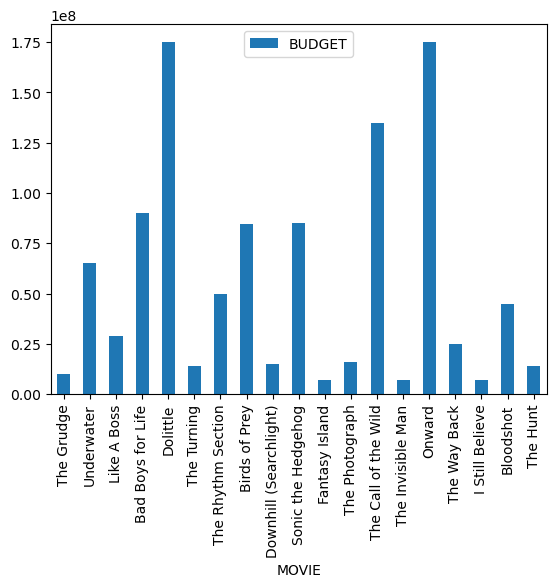

In [7]:
movie_df.plot(x='MOVIE', y='BUDGET', kind="bar")

Pandas plot uses the `matplotlib` python package underneath to generate these plots. Matplotlib is a very powerful package for plotting data with a ton more options and customization than what pandas plot() provides. For example, see below: 

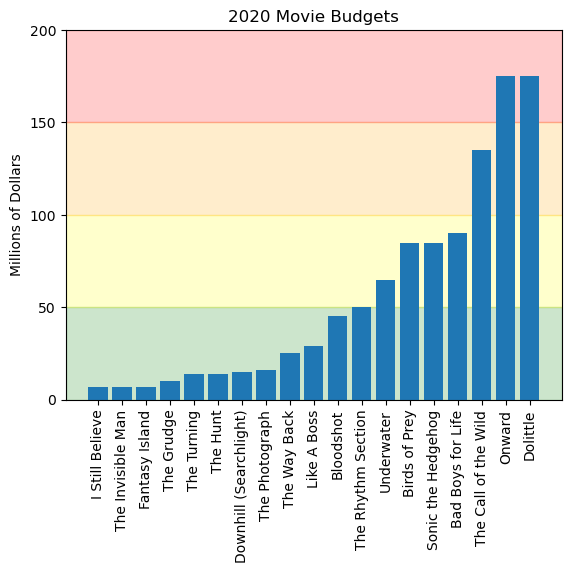

In [8]:
# impot the pyplot package from matplotlib as plt
from matplotlib import pyplot as plt

# create a new DataFrame that is sorted by the BUDGET column
df_sorted = movie_df.sort_values(by='BUDGET')
# format the y axis to use millions of dollars
plt.yticks([0, 50000000, 100000000, 150000000, 200000000], ['0', '50', '100', '150', '200']);
# add y label for millions of dollars
plt.ylabel('Millions of Dollars');
# add a title to the top of the graph
plt.title('2020 Movie Budgets');
# rotate x axis labels 90 degrees
plt.xticks(rotation=90);
# add color ranges for the y-axis values (here green is the smallest budget range, red is the largest budget range)
plt.axhspan(0, 50000000, color='green', alpha=0.2);
plt.axhspan(50000000, 100000000, color='yellow', alpha=0.2);
plt.axhspan(100000000, 150000000, color='orange', alpha=0.2);
plt.axhspan(150000000, 200000000, color='red', alpha=0.2);
# make max y value 200 million
plt.ylim(0, 200000000)
# plot the sorted DataFrame with matplotlib
plt.bar(df_sorted['MOVIE'], df_sorted['BUDGET'], alpha=1);

The fact that matplotlib is so customizable is useful in a lot of situations and its good to keep in your backpocket. But for the most part, we'll be using the Pandas plot() method in this project. And later we'll be using the Geopandas package which is very useful for generating visualizations with maps. 

Lets see if we can find a correlation between the budget of a movie and its gross profit. This time we will use pandas directly to create the matplotlib graph object. Then we will use that object to format the graph appropriately.



## 4. Correlation and Causation

What does it mean to for two variables to be correlated? 

It means that two quantities share an associated relationship. Quantities can be positively correlated so that as one increases, so does the other or negatively correlated so that an increase in one may correlate to a decrease in the other. A correlation between two quantities does not mean than the change in one is caused by the change in the other. Both quantities could be changing because of other unexplored factors that may or may not be causally related. 

For example, global average temperatures can be shown to have a negative correlation to the number of practicing global maritime pirates.  https://www.linkedin.com/pulse/pirates-global-warming-correlation-causation-changing-sarah-casey/ Clearly, the decrease in pirates is not causally driving climate change. 

Causation is more compilated than correlation and requires more lines of evidence and methods to prove, though a combination of correlations may help identify causal relationships. For this challenge we will stick to searching for correlations due to the time limits we have for the camp. 

Correlation can sometimes be seen obviously in a plot or visualization of the data. However, often it is not easy to visually identify a correlation. Statistics gives us methods to quantify correlation between quantities.  Which statistics tools should be used to measure correlation depends on how the data is distributed. There are several methods.
 

### Tools


We will explore two tools in this challenge’s tutorial, the Pearson correlation, and the Spearman Rank correlation. We will also explorethe  p-vale which gives an indication of the statical significance of a correlation.

For details See https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/.

### Pearson Correlation

The Pearson correlation is appropriate for data meeting the two following characteristics: 

* The two quantities you are exploring are each normally distributed, meaning a plot of how frequently each value in the data set occurs forms a bell curve (see https://www.sigmamagic.com/blogs/is-my-data-normally-distributed/).
* The two quantities show a mostly linear relationship when one variable is plotted against the other.
* 

The Pearson correlation scores the data between -1 and 1. Two variables that increase linearly together will have a score closer to 1. Variables that show a relationship where one increases as the other decreases will have a score nearer -1. Variables that don’t show a relationship will have a score near 0. 

### Spearman Rank Correlation 

The Spearman correlation also measures the degree of association between two variables. 

* The data does not have to be normally distributed for this method to show association.
* The data however must be ordinate, meaning that both quantities of data that you are comparing must be rankable (can be ordered from largest to smallest). See https://careerfoundry.com/en/blog/data-analytics/what-is-ordinal-data/#an-introduction-to-the-four-different-types-of-data

Example: hair color itself is not a meaningfully rankable quantity but the number of people with a specific hair color is a rankable quantity, so it is ordinate.

The Spearman Rank Correlation tells you that the data either increases or decreases monotonically. It makes no assumptions about the linearity of the relationship or the distribution of the data.

This means that if you plotted the two variables your were testing for correlation against one another, you could draw a trend line through the data that would roughly pass though the locations of most of the data points, but thatrend t line might be curvyReal data will almost always have points that fall outside the trend line. .
Spearman Rank scores vary between -1 and 1. A score closer to 1 indicates positive associations and scores nearer negative 1 indicate negative associations. Scores near 0 indicate no association. 

### Probability Value (P-Value) 



The p-value is a measure of how likely associations found between differnt quantieies in the data are due to be the result of random chance rather than a statically significant correlation. The level of statistical significance is often expressed as a p-value between 0 and 1. For either the Pearson or the Spearman rank correlation tests, you need to find the p-value too to show that an association is statically significant. The smaller the p-value the less likely the results occurded by random chance, and the stronger the evidence that you have found a significant association between variables in your data set. 

You can use the Statistics package in Scipy to do the Pearson or Spearman tests and the P value.



See: https://www.simplypsychology.org/p-value.html
NoteNote

These types of statical tests are necessary for finding correlations in data because real data sets generally have many data points that lie outside the main line of a given trend, so the trends are not always easy to spot and classify visually in plots of the da## Experiment with Correlation

Let's exoplore correlation with our movie dataset. 

Run the cells below and read along. ataset. 
ds.


For this experiment we will test to see if the data shows if a movie's budget is correlated with its gross profits. 

Let's try sorting the data based on profit. We'll use matpolotlib again for this. It is already loaded above so you don't need to reload it. 


In [9]:
# add a new column to the DataFrame that calculates the revenue (BOX OFFICE - BUDGET)
df_sorted['GROSS PROFIT'] = df_sorted['BOX OFFICE'] - df_sorted['BUDGET']

# Resort the data by Gross Profit. 

df_sorted2 = df_sorted.sort_values(by='GROSS PROFIT')
df_sorted2


,STUDIO,DATE,MOVIE,BUDGET,BOX OFFICE,MULTIPLIER,TYPE,GROSS PROFIT
14,DISNEY,2020-03-06,Onward,175000000,101700000,0.58,Original,-73300000
6,PARAMOUNT,2020-01-31,The Rhythm Section,50000000,5900000,0.12,Novel,-44100000
12,FOX,2020-02-21,The Call of the Wild,135000000,107300000,0.79,Novel,-27700000
1,FOX,2020-01-10,Underwater,65000000,39200000,0.60,Original,-25800000
17,SONY,2020-03-13,Bloodshot,45000000,24400000,0.54,IP,-20600000
15,WARNER,2020-03-06,The Way Back,25000000,14100000,0.56,Original,-10900000
18,UNIVERSAL,2020-03-13,The Hunt,14000000,6000000,0.43,Original,-8000000
8,FOX,2020-02-14,Downhill (Searchlight),15000000,8800000,0.59,Original,-6200000
2,PARAMOUNT,2020-01-10,Like A Boss,29000000,26100000,0.90,Original,-2900000
16,LIONSGATE,2020-03-13,I Still Believe,7000000,9500000,1.36,Biopic,2500000


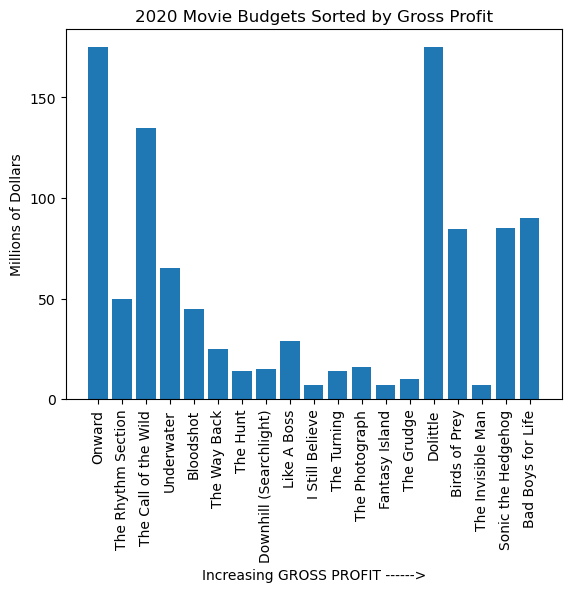

In [10]:
#Now plot the data by movie name and budget/ 
plt.yticks([0, 50000000, 100000000, 150000000, 200000000], ['0', '50', '100', '150', '200']);
# add y label for millions of dollars
plt.ylabel('Millions of Dollars');
plt.xlabel('Increasing GROSS PROFIT ------>');
# add a title to the top of the graph
plt.title('2020 Movie Budgets Sorted by Gross Profit');
# rotate x axis labels 90 degrees
plt.xticks(rotation=90);

plt.bar(df_sorted2['MOVIE'], df_sorted2['BUDGET']);

#would be good to add a coloration across the X-axis that maps to sort ranges for Gross Profit) 

Now lets practice loading up our actual datasets and generating plots. Similar to how we used pd.read_excel to load an excel file, we can use pd.read_csv can be used to load a csv file

Viewing the data this way, it looks like there is one cluster of higher movie budgets associated with the lowest Gross Profits (losses) and another cluster of higher movie budgets associated with the highest gross profits, however it looks like the sum of the budgets near the low grossing (loss) end of the Profit spectrum is larger than that at the high end. 

This could indicate a weak anti-correlation between film budgets and Gross Profit or that there is no correlation. Let’s use our statistical tests to quantify the correlation. 


Let's test the data sets for normality and linearity. 


(array([8., 2., 2., 1., 3., 0., 0., 1., 0., 2.]),
 array([7.000e+06, 2.380e+07, 4.060e+07, 5.740e+07, 7.420e+07, 9.100e+07,
        1.078e+08, 1.246e+08, 1.414e+08, 1.582e+08, 1.750e+08]),
 <BarContainer object of 10 artists>)

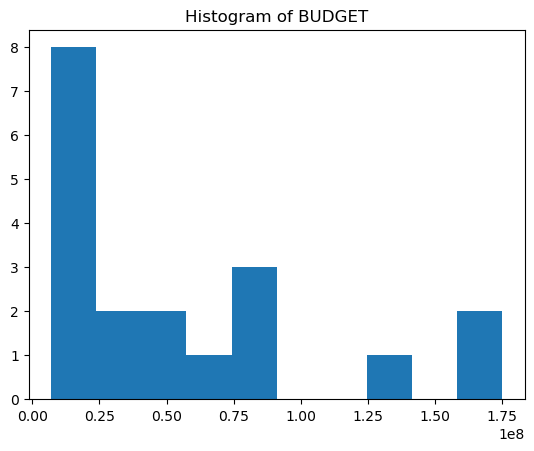

In [11]:
# Test for normality for Movie BUDGET using the hist function, a histogram, 
# which shows bars with heights that represent the most frequently occurring values for Budget in the data. 
from matplotlib import pyplot 
plt.title('Histogram of BUDGET');
pyplot.hist(df_sorted2['BUDGET'])


How to read the plot: Movie budget is on the X-axis and the Y axis shows how many movies fit in each of the bar's budget catigory. For example, the plot shows eight movies that have budgets between 0 and 25 million dollares. 

The most frequently occring BUDGET values skew to the low end of the movie budgets. This histogram does not show a Bell Curve so budget id not a norally distributed. 

### Exercise

1. In the cell below make a histogram for the GROSS PROFIT data. 

2. Give it an approproate title.

3. Does the GROSS PROFIT Data look normally distributed?

4. What Gross profit range contains most of the movies? 

In [12]:
# TO DO: Let's look at the histogram for GROSS PROFIT.




### Let's look at the linearity or Monotonicty of the data using a scatter plot. 

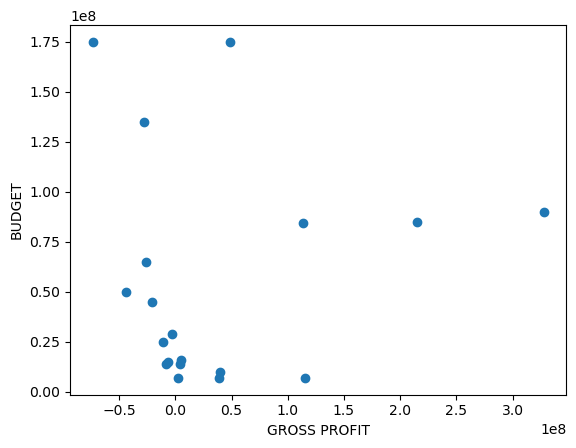

In [13]:
# Scatter plot  GROSS PROFIT vs 
plt.scatter(df_sorted2['GROSS PROFIT'], df_sorted2['BUDGET'])

plt.ylabel('BUDGET');
plt.xlabel('GROSS PROFIT');

# TO DO Put in a linear regression line. 
#Could not get this to work with Numpy, may need to do it with loops and equations. 

There does seem to be a small clustering of the data in the lower left of the plot, where 12 points fall in what might be a negatively sloping monotonic trend. There are however, 7 points that don't seem to be part of that trend, so it is not a strong trend. e. 



### Determining What Correlation Test to Use 
Looks like we don't have a normal distribution for our data, so he Pearson Coefficient won't be a good way to quantify the correlation.

Since more than half our data seems to display a monotonic trend, let's look at the Spearman correlation using the scipy stats package. 


In [14]:
import scipy.stats
from scipy.stats import spearmanr
corr3 = scipy.stats.spearmanr(df_sorted2['BUDGET'], df_sorted2['GROSS PROFIT'])
corr3

SignificanceResult(statistic=-0.16358895993917005, pvalue=0.5033749317021476)

### Interpreting the Spearman Rank Score and P-value
 
 The Spearman rank is small and negative, which might indicate a very week monotonic anti-correlation between BUDGET and GROSS PROFIT. However, Scipy also gives the p-value, P-values near 1 indicate low statical significance for the correlation and P values near 0 indicate high statical significance. The P-value for this is ~0.5, which indicates only a moderate chance that the weak anit-correlation seen in this data is a statically significant. 

## 5. Practice with Real Data

Now lets practice loading up our actual datasets and generating plots. Similar to how we used pd.read_excel to load an excel file, we can use pd.read_csv can be used to load a csv file

In [15]:
df = pd.read_csv("data/CtyAvTemp62016.csv", delimiter=',', skiprows=0, low_memory=False)

df

,OBJECTID_1,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Date_,TempK
0,1,2,185,2185,North Slope,69.449343,-153.472830,6/20/2016 0:00,278.599976
1,2,2,188,2188,Northwest Arctic,67.005066,-160.021086,6/20/2016 0:00,281.899994
2,3,2,290,2290,Yukon-Koyukuk,65.375727,-151.577850,6/20/2016 0:00,283.600006
3,4,2,180,2180,Nome,64.783686,-164.188912,6/20/2016 0:00,279.375000
4,5,2,90,2090,Fairbanks North Star,64.676044,-146.548159,6/20/2016 0:00,283.224976
...,...,...,...,...,...,...,...,...,...
3228,3229,60,40,60040,Swains Island,-11.054436,-171.069014,6/20/2016 0:00,300.750000
3229,3230,60,10,60010,Eastern,-14.268114,-170.625706,6/20/2016 0:00,300.024994
3230,3231,60,50,60050,Western,-14.335468,-170.784233,6/20/2016 0:00,300.024994
3231,3232,60,20,60020,Manu'a,-14.219801,-169.507697,6/20/2016 0:00,299.899994


You'll notice the table isn't displayed fully. That's normal, Jupyter truncates what is visible to save screen space. Rest assured the full data is present. 

### Exercise
1. Can you figure out how to add another column to show temperature in Farenheit?
2. Learning what you have learned about filtering data and plotting with pandas, can you create the same charts here that you created with google sheets?
Use the below cell (or use as many cells as you'd like!). You can create more cells below by clicking on Insert->Insert Cell Below (or Insert Cell Above) which will insert a cell below or above the currently selected cell. 



### Merging dataframes

Something useful you can do with pandas dataframes is that you can merge two of them together based on the columns. Say for example you have loaded the following two datasets as data frames

In [16]:
# specifying sheet_name since there are three sheets in the 2016_HHSemPOWERMapHistoricalDataset.xlsx file
df1 = pd.read_excel("data/2016_HHSemPOWERMapHistoricalDataset.xlsx", sheet_name="County") 
df1

,FIPS_Code,County_FIPS_Code,County,State_FIPS_Code,State,Jan_2016_Medicare_Benes,Jan_2016_Power_Dependent_Devices_DME,Feb_2016_Medicare_Benes,Feb_2016_Power_Dependent_Devices_DME,Mar_2016_Medicare_Benes,...,Aug_2016_Medicare_Benes,Aug_2016_Power_Dependent_Devices_DME,Sep_2016_Medicare_Benes,Sep_2016_Power_Dependent_Devices_DME,Oct_2016_Medicare_Benes,Oct_2016_Power_Dependent_Devices_DME,Nov_2016_Medicare_Benes,Nov_2016_Power_Dependent_Devices_DME,Dec_2016_Medicare_Benes,Dec_2016_Power_Dependent_Devices_DME
0,1001,1,Autauga,1,AL,9025,546,9043,546,9045,...,9142,529,9206,546,9236,577,9257,589,9275,595
1,1003,3,Baldwin,1,AL,42231,2025,42434,2037,42599,...,43236,2034,43434,2041,43669,2117,43855,2133,44002,2129
2,1005,5,Barbour,1,AL,5266,242,5267,238,5281,...,5310,251,5342,254,5348,260,5352,264,5345,254
3,1007,7,Bibb,1,AL,4616,211,4623,211,4623,...,4621,194,4635,190,4620,209,4624,218,4620,222
4,1009,9,Blount,1,AL,8631,594,8631,589,8655,...,8670,567,8708,575,8710,585,8733,591,8712,594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,72151,151,Yabucoa,72,PR,7560,274,7582,274,7592,...,7612,272,7643,271,7653,276,7650,267,7648,257
3224,72153,153,Yauco,72,PR,7094,263,7117,245,7118,...,7184,243,7218,229,7244,232,7251,236,7251,232
3225,78010,10,Saint Croix,78,VI,8538,72,8558,69,8558,...,8611,53,8663,56,8674,55,8681,53,8667,52
3226,78020,20,Saint John,78,VI,740,11,745,11,748,...,757,0,760,0,765,11,765,11,762,11


In [17]:
df2 = pd.read_csv("data/CtyAvTemp62016.csv", delimiter=',', skiprows=0, low_memory=False)
df2

,OBJECTID_1,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Date_,TempK
0,1,2,185,2185,North Slope,69.449343,-153.472830,6/20/2016 0:00,278.599976
1,2,2,188,2188,Northwest Arctic,67.005066,-160.021086,6/20/2016 0:00,281.899994
2,3,2,290,2290,Yukon-Koyukuk,65.375727,-151.577850,6/20/2016 0:00,283.600006
3,4,2,180,2180,Nome,64.783686,-164.188912,6/20/2016 0:00,279.375000
4,5,2,90,2090,Fairbanks North Star,64.676044,-146.548159,6/20/2016 0:00,283.224976
...,...,...,...,...,...,...,...,...,...
3228,3229,60,40,60040,Swains Island,-11.054436,-171.069014,6/20/2016 0:00,300.750000
3229,3230,60,10,60010,Eastern,-14.268114,-170.625706,6/20/2016 0:00,300.024994
3230,3231,60,50,60050,Western,-14.335468,-170.784233,6/20/2016 0:00,300.024994
3231,3232,60,20,60020,Manu'a,-14.219801,-169.507697,6/20/2016 0:00,299.899994


Something you'll notice is that FIPS_Code in df1 and GEOID in df2 are both FIPS Code values. Each df represents a county in each row. __NOTE:__ You'll also notice that they don't have the same number of rows, indicating not all counties may be represented in both dfs i.e. counties represented in one df may not be represented in the other. You'll encounter missing data like this in other places as well. That's something to be wary of: don't assume your data is perfect. We'll be working with the data we have in this project, so we won't worry about missing counties. 

Now we can merge both dataframes into one dataframe where the rows corresponding to the same FIPS code are smooshed together into the same row. We do this with the `merge` method (see documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html )


In [18]:
df_merged = df1.merge(df2, how="inner", left_on="FIPS_Code", right_on="GEOID")
df_merged

,FIPS_Code,County_FIPS_Code,County,State_FIPS_Code,State,Jan_2016_Medicare_Benes,Jan_2016_Power_Dependent_Devices_DME,Feb_2016_Medicare_Benes,Feb_2016_Power_Dependent_Devices_DME,Mar_2016_Medicare_Benes,...,Dec_2016_Power_Dependent_Devices_DME,OBJECTID_1,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Date_,TempK
0,1001,1,Autauga,1,AL,9025,546,9043,546,9045,...,595,2616,1,1,1001,Autauga,32.532237,-86.646439,6/20/2016 0:00,296.175018
1,1003,3,Baldwin,1,AL,42231,2025,42434,2037,42599,...,2129,2885,1,3,1003,Baldwin,30.659218,-87.746067,6/20/2016 0:00,298.000000
2,1005,5,Barbour,1,AL,5266,242,5267,238,5281,...,254,2899,1,5,1005,Barbour,31.870253,-85.405103,6/20/2016 0:00,298.125000
3,1007,7,Bibb,1,AL,4616,211,4623,211,4623,...,222,2627,1,7,1007,Bibb,33.015893,-87.127148,6/20/2016 0:00,296.175018
4,1009,9,Blount,1,AL,8631,594,8631,589,8655,...,594,2613,1,9,1009,Blount,33.977357,-86.566440,6/20/2016 0:00,296.175018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,72151,151,Yabucoa,72,PR,7560,274,7582,274,7592,...,257,3177,72,151,72151,Yabucoa,18.059858,-65.859871,6/20/2016 0:00,301.200012
3222,72153,153,Yauco,72,PR,7094,263,7117,245,7118,...,232,3151,72,153,72153,Yauco,18.085669,-66.857901,6/20/2016 0:00,300.924988
3223,78010,10,Saint Croix,78,VI,8538,72,8558,69,8558,...,52,3191,78,10,78010,St. Croix,17.735321,-64.746741,6/20/2016 0:00,301.200012
3224,78020,20,Saint John,78,VI,740,11,745,11,748,...,11,3197,78,20,78020,St. John,18.330435,-64.735261,6/20/2016 0:00,301.200012


In the above cell, the `merge()` method is called from one dataframe (considered the 'left' dataframe) and takes as arguments the other dataframe (called the 'right' dataframe), the method used to merge ('inner' means we use values that are present in the selected columns to merge on in both dataframes), and the left and right dataframe's columns to compare when merging ('left_on' is 'FIPS_Code' in the left dataframe and 'right_on' is 'GEOID' in the right dataframe, since they are both FIPS Code values).

### Exercise
1. Try experimenting with other kinds of merge methods other than 'inner'. What do they do?
2. Can you create a chart that displays both temperature and Jun_2016_Power_Dependent_Devices_DME from your merged df? As an example see https://github.com/secondspass/jupyter_bootcampproject_examples/blob/master/intro_notebooks/intro.ipynb to see how to do multiple bars in a bar chart
    a. This might result in a very large barchart, so how would you filter your dataframe down to specific counties? (hint: the next section might have some clues) Then draw charts visualizing this information for specific counties you want.

## 6. Exploring the power outage dataset eaglei_outages_2016.csv

The `eaglei_outages_2016.csv` file is structured a little differently. Each Row represents 15 minute increments in the year 2016 for a county, and gives the number of customers who were out of power during that 15 minute period in the "sum" column. So in this datset, you get data that evolves over a period of time (in this case, over the year 2016). So as you can imagine, with the number of 15 minute increments in a year and the number of counties in the US, there are a lot of rows. This is called a 'time series' dataset.

Two things to note about the data in run_start_time and sum:
1. The time is given in UTC so it is not showing the timezone of the county in question.
2. Not all time intervals between data points are in intervals of 15 min. If there were no power outages happening in a county during a particular 15 min interval, thosrows s are left out of the data table. This helps minimize the size of the daa set. However, it may make it more difficult to compare counties with different time sample rates.
l.'

Lets create a dataframe with this dataset. Make sure the 'eaglei_outages_2016.csv' file is in the data folder.

In [19]:
import numpy as np
import scipy
from scipy import interpolate
import pandas as pd

In [20]:
eaglei_outages_df = pd.read_csv("data/eaglei_outages_2016.csv", delimiter=',', skiprows=0, low_memory=False)


In [21]:
eaglei_outages_df

,fips_code,county,state,sum,run_start_time
0,2122,Kenai Peninsula,Alaska,657,2016-01-01 00:00:00
1,5003,Ashley,Arkansas,7,2016-01-01 00:00:00
2,5029,Conway,Arkansas,2,2016-01-01 00:00:00
3,5069,Jefferson,Arkansas,41,2016-01-01 00:00:00
4,5081,Little River,Arkansas,61,2016-01-01 00:00:00
...,...,...,...,...,...
13306019,54061,Monongalia,West Virginia,472,2016-12-31 00:00:00
13306020,54069,Ohio,West Virginia,37,2016-12-31 00:00:00
13306021,54075,Pocahontas,West Virginia,200,2016-12-31 00:00:00
13306022,54099,Wayne,West Virginia,2,2016-12-31 00:00:00


You can see that there is a column called 'run_start_time' that marks a date and time. That will allow you to filter for specific days, or even specific date or time ranges. For example, if you want to filter the rows down to only those for 2016-01-20 and 2016-06-21, you can do so by doing something like

In [22]:
# we can combine two or more conditions in loc with the & symbol
# the & symbol between conditions indicates that both need to be satisfied for a given row
eaglei_outages_20_21_df = eaglei_outages_df.loc[(eaglei_outages_df['run_start_time'] >= "2016-06-20 00:00:00") 
                                                & (eaglei_outages_df['run_start_time'] < "2016-06-22 00:00:00")]
eaglei_outages_20_21_df

,fips_code,county,state,sum,run_start_time
5966141,4013,Maricopa,Arizona,754,2016-06-20 00:00:00
5966142,4019,Pima,Arizona,1027,2016-06-20 00:00:00
5966143,5003,Ashley,Arkansas,54,2016-06-20 00:00:00
5966144,5045,Faulkner,Arkansas,2,2016-06-20 00:00:00
5966145,5093,Mississippi,Arkansas,2,2016-06-20 00:00:00
...,...,...,...,...,...
6046879,55073,Marathon,Wisconsin,1,2016-06-21 23:45:00
6046880,55093,Pierce,Wisconsin,1,2016-06-21 23:45:00
6046881,55101,Racine,Wisconsin,2,2016-06-21 23:45:00
6046882,55133,Waukesha,Wisconsin,7,2016-06-21 23:45:00


Now from this say we want to compare the power outage numbers over those two days for certain counties (e.g. Los Angeles,CA and Pima,AZ) with a line chart, how do we do that? 

We could just make separate line charts. That's pretty easy.


<Axes: title={'center': 'Los Angeles Power outages'}, xlabel='run_start_time', ylabel='power outages'>

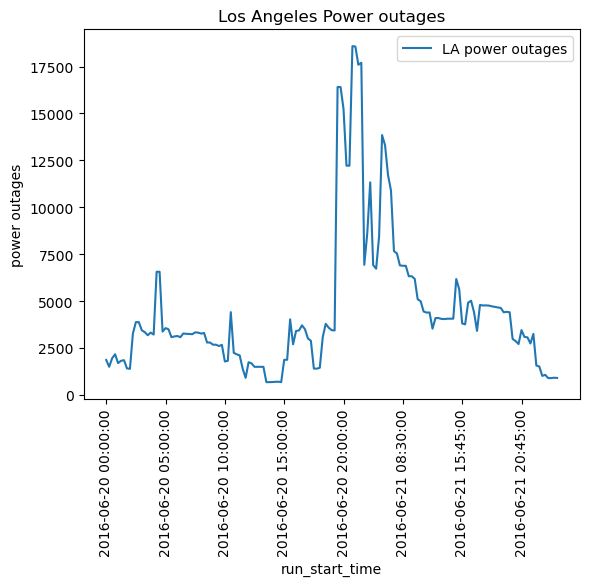

In [23]:
losangeles_df = eaglei_outages_20_21_df.loc[eaglei_outages_df['fips_code'] == 6037]
losangeles_df.plot(x="run_start_time", y="sum", rot=90, title="Los Angeles Power outages", ylabel="power outages", label="LA power outages")

<Axes: title={'center': 'Pima AZ Power outages'}, xlabel='run_start_time', ylabel='power outages'>

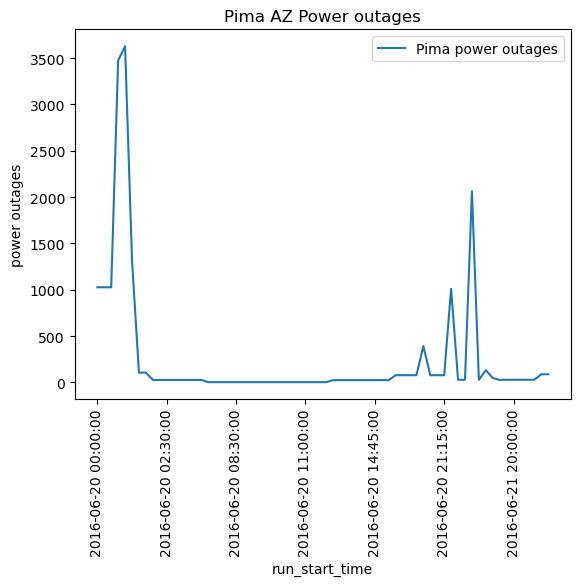

In [24]:
pima_df = eaglei_outages_20_21_df.loc[eaglei_outages_df['fips_code'] == 4019]
pima_df.plot(x="run_start_time", y="sum", rot=90, title="Pima AZ Power outages", ylabel="power outages", label="Pima power outages")

But it would be neat if they could be on the same chart. How do we do that? We can do something like the below

Text(0.5, 1.0, 'Comparing LA and Pima')

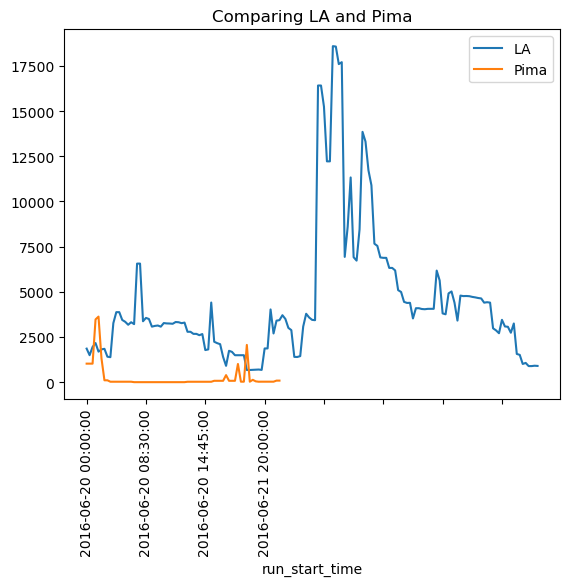

In [25]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
# specifying ax makes sure that the same figure is used for plotting both dataframes
# los angeles data
losangeles_df.plot(ax=ax,x="run_start_time", y="sum", rot=90, label="LA")
# Pima data
pima_df.plot(ax=ax,x="run_start_time", y="sum", rot=90, label="Pima")
plt.title("Comparing LA and Pima")



Well that looks a little weird, doesn't it? What happened? 

Lets investigate the size of the Los Angeles and Pima dataframes

In [26]:
print("rows, columns of the LA dataframe:", losangeles_df.shape)
print("rows, columns of the Pima dataframe:", pima_df.shape)

rows, columns of the LA dataframe: (153, 5)
rows, columns of the Pima dataframe: (66, 5)


In [27]:
losangeles_df


,fips_code,county,state,sum,run_start_time
5966152,6037,Los Angeles,California,1858,2016-06-20 00:00:00
5966613,6037,Los Angeles,California,1495,2016-06-20 00:15:00
5967049,6037,Los Angeles,California,1949,2016-06-20 00:30:00
5967489,6037,Los Angeles,California,2165,2016-06-20 00:45:00
5967939,6037,Los Angeles,California,1692,2016-06-20 01:00:00
...,...,...,...,...,...
6044061,6037,Los Angeles,California,1067,2016-06-21 22:45:00
6044634,6037,Los Angeles,California,892,2016-06-21 23:00:00
6045205,6037,Los Angeles,California,892,2016-06-21 23:15:00
6045775,6037,Los Angeles,California,912,2016-06-21 23:30:00


As you can see, the LA dataframe has a lot more rows than the Pima dataframe. This could indicate that the Pima dataframe does not have all the timestamps that the LA dataframe has i.e. there is more data collected for the LA dataframe. So we're running into the age old problem in data science: missing data. Always be wary of the fact that your data may not be as complete as you think! We can still do the comparison though, we just need to up sample the time series data for Pima and interpolate the power outage data to match the new sample rate. We will start by converting the date and time data into an integer so that it is easier to up sample. Here is an explanation  of linear interpolation: https://en.wikipedia.org/wiki/Linear_interpolation.

In [28]:
# use the to_datetime function and the apply function to covert the date and time into a single representaie integer
pima_df['time'] = pima_df['run_start_time'].apply(lambda run_start_time : pd.to_datetime(run_start_time).value)

pima_df

/var/folders/yc/bhv4y9kn64d3vbj319tpd9qxsjf3cl/T/ipykernel_68056/2509149769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pima_df['time'] = pima_df['run_start_time'].apply(lambda run_start_time : pd.to_datetime(run_start_time).value)


,fips_code,county,state,sum,run_start_time,time
5966142,4019,Pima,Arizona,1027,2016-06-20 00:00:00,1466380800000000000
5966603,4019,Pima,Arizona,1027,2016-06-20 00:15:00,1466381700000000000
5967039,4019,Pima,Arizona,1027,2016-06-20 00:30:00,1466382600000000000
5967478,4019,Pima,Arizona,3474,2016-06-20 00:45:00,1466383500000000000
5967928,4019,Pima,Arizona,3629,2016-06-20 01:00:00,1466384400000000000
...,...,...,...,...,...,...
6038024,4019,Pima,Arizona,29,2016-06-21 20:15:00,1466540100000000000
6038644,4019,Pima,Arizona,29,2016-06-21 20:30:00,1466541000000000000
6039252,4019,Pima,Arizona,29,2016-06-21 20:45:00,1466541900000000000
6045194,4019,Pima,Arizona,88,2016-06-21 23:15:00,1466550900000000000


In [29]:
pd.to_datetime(1466380800000000000)

Timestamp('2016-06-20 00:00:00')

In [30]:
losangeles_df['time'] = losangeles_df['run_start_time'].apply(lambda run_start_time : pd.to_datetime(run_start_time).value)

losangeles_df

/var/folders/yc/bhv4y9kn64d3vbj319tpd9qxsjf3cl/T/ipykernel_68056/3920857566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losangeles_df['time'] = losangeles_df['run_start_time'].apply(lambda run_start_time : pd.to_datetime(run_start_time).value)


,fips_code,county,state,sum,run_start_time,time
5966152,6037,Los Angeles,California,1858,2016-06-20 00:00:00,1466380800000000000
5966613,6037,Los Angeles,California,1495,2016-06-20 00:15:00,1466381700000000000
5967049,6037,Los Angeles,California,1949,2016-06-20 00:30:00,1466382600000000000
5967489,6037,Los Angeles,California,2165,2016-06-20 00:45:00,1466383500000000000
5967939,6037,Los Angeles,California,1692,2016-06-20 01:00:00,1466384400000000000
...,...,...,...,...,...,...
6044061,6037,Los Angeles,California,1067,2016-06-21 22:45:00,1466549100000000000
6044634,6037,Los Angeles,California,892,2016-06-21 23:00:00,1466550000000000000
6045205,6037,Los Angeles,California,892,2016-06-21 23:15:00,1466550900000000000
6045775,6037,Los Angeles,California,912,2016-06-21 23:30:00,1466551800000000000


### How to Up Sample Data with numpy

To make a comparison, both the Los Angeles and Pima county data sets need to be up-sampled so that they have the same time frequency. We'll create a time array,new_t, that has the right time frequency and then interpolate between all the data points in the data series to follow the new greater time frequency. 

We will use numpy arrays to do the interpolation because numpy has an interpolate function that will make this quite easy. It may be possible to do it entirely in pandas data frames, though. Perhaps you can google it and find out!



In [31]:
#Step 1.: Convert all the padas dataframes for time and sum of outages to numpy arrays. 
#tla_arr is the timestamp array for Los Angeles County
#sla_arr is the sum of customers without power for that timestamp for Los Angeles County
#tp_arr is the timestamp array for Pima County
#sla_arr is the sum of customers without power for that timestamp for Pima County
import numpy as np
tla_arr = losangeles_df['time'].to_numpy()
sla_arr = losangeles_df['sum'].to_numpy()
tp_arr = pima_df['time'].to_numpy()
sp_arr= pima_df['sum'].to_numpy()


In [32]:
#Step2 make a group of functions that follow the changes in time and number of outage between each data point in each series. 
# For example, if the time interval between the first and second data points in the Pima county data series is 30 minutes rather
# than 15 min, like it is in the LA County series, these functions below
# help us follow that for that so we will be able to up sample the Pima series for 15 minute intervals.


fp = interpolate.interp1d(tp_arr,tp_arr)
ffp = interpolate.interp1d(tp_arr,sp_arr)
fs = interpolate.interp1d(tla_arr,tla_arr)
ffs= interpolate.interp1d(tla_arr,sla_arr)

Step 3: Make a time series array to use to up sample all the data to the time frequency we want. 

We will use the numpy  np.arange function to do this. It takes three arguments: start time, end time and increment. In the cells below we find those values using the los angeles data because it has the highest sample rate. 



In [33]:
#Step 3a: Find the time increment

#We want a time frequency that captures the best available detail in the data. 

#If you go up and look at the run_start_time data for LA country, you will notice that most data points are 15 minutes apart. 
# a 15 minute increment corresponds to 900000000000 in our timestamp. 

#Find the time increment in the LA data by subtracting the first time from the second timestamp data.
test = 1466382600000000000 - 1466381700000000000
test


900000000000

In [34]:
#Step 3b: Find how large our sampling array 
# find the last value in the array 
print(losangeles_df.iloc[-1])

fips_code                        6037
county                    Los Angeles
state                      California
sum                               901
run_start_time    2016-06-21 23:45:00
time              1466552700000000000
Name: 6046333, dtype: object


In [35]:
# Step 3c: Make an array that has a timestamp for every 15 minutes for the full range of the time data in the day.  
# # np.arange(start time, end time, increment) 
# we cut and past the start time from the first point in the Los Angeles data series. 
# we use the end time and increment that we found in the cells above.

new_t=np.arange(1466380800000000000,1466552700000000000,900000000000)
len(new_t)

191

In [36]:
# Step 4: use the functions you found in step 2 above and the new_t array from Step 3, t
# o up sample all of the time and sum ( of customers without power) data 
# to the new time frequency of 15 minutes.  

# xnewp = Pima timestamp upsampled to 15 min intervals
# xnewpt = Upsample Pima timestamp data converted back to human readable Month/Day/Hour 
# ynewp Pima "sum" data up sampled to the new 15 min time intervals 
# xnewla = Los Angeles timestamp upsampled to 15 min intervals
# ynewla = Los Angeles "sum" upsampled to 15 min intervals
xnewp = fp(new_t)
xnewpt=pd.to_datetime(new_t)
ynewp = ffp(new_t)
xnewla = fs(new_t)
ynewla = ffs(new_t)


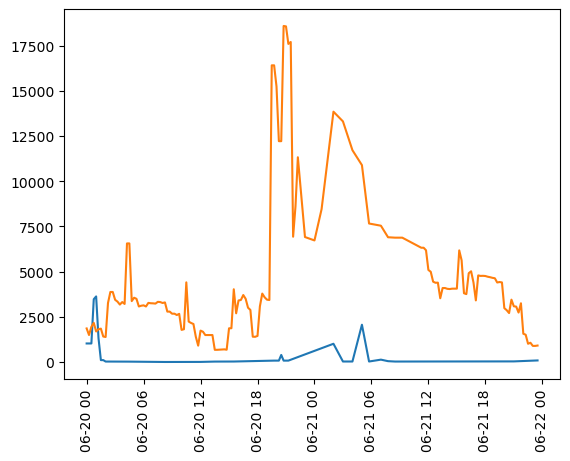

In [37]:
# Plot the data 

plt.xticks(rotation=90);
plt.plot(xnewpt,ynewp,'-')
plt.plot(xnewpt,ynewla,'-')


Interesting! Though Los Angeles county has a much larger total number of customers without power at it maxiums than Pima county, the 2nd Pima county maximum looks like its happening at roughly the same time as the Los Angeles county 2nd maximun. 

The two counties are in the same time zone. It is helpful to note that the eagle-I data time is set in UTC. What time is it in LA at 6:00 am UTC? Do you suppose the weather could be causing the outage maxumums? Is 6:00 am UTC a time when lots of people would be home cooking and runnning their air conditioning in LA or in Pima?
 
 
 Perhaps evenyone is getting up for work at 6 AM turning on thier stoves, air conditioners and hair dryers and overwhelmeing the power grid? Do you suppose that other near-by counties show maxumum of customeres without power in the 6 am o'clock hour. 


### Exercise
1. 
Pick another nearby county ora  few, up sample and interpolate their data then plotthemt with Pima and Los Angeles (San Bernadino would be interesting).

2. Do thier outage maximums happen near the same time?
3. 1. What do you suppose accounts for the very different number of customers without power for each county? Can you visualize anything like population or poverty to show those compare for your selected counies? are


## 6. Aggregating time series data to get mean and median

Now that we've learned how to work with and visualize time series, it would also be useful to know how to _aggregate_ data across a time series. Say you want to find the average of power outages across the whole day for Los Angeles county for June 20. But we know that the data is in 15 minute chunks, and that the `run_start_time` column is in UTC so has to be adjusted to get June 20 local time. 

Again, Pandas comes to the rescue. Lets make use of the eaglei_outages_df we created earlier


In [38]:
eaglei_outages_df

,fips_code,county,state,sum,run_start_time
0,2122,Kenai Peninsula,Alaska,657,2016-01-01 00:00:00
1,5003,Ashley,Arkansas,7,2016-01-01 00:00:00
2,5029,Conway,Arkansas,2,2016-01-01 00:00:00
3,5069,Jefferson,Arkansas,41,2016-01-01 00:00:00
4,5081,Little River,Arkansas,61,2016-01-01 00:00:00
...,...,...,...,...,...
13306019,54061,Monongalia,West Virginia,472,2016-12-31 00:00:00
13306020,54069,Ohio,West Virginia,37,2016-12-31 00:00:00
13306021,54075,Pocahontas,West Virginia,200,2016-12-31 00:00:00
13306022,54099,Wayne,West Virginia,2,2016-12-31 00:00:00


In [39]:
# to get only Los Angeles, lets select by the FIPS code and also make sure that run_start_time is
# within 2016-06-20 00:00:00 and 2016-06-21 00:00:00 Pacific standard time (or in the case of June
# Pacific Daylight time, which is 7 hours behind UTC)
la_outages_0620_df = eaglei_outages_df.loc[(eaglei_outages_df["fips_code"]==6037) 
                                          & (eaglei_outages_df["run_start_time"]>="2016-06-19 17:00:00")
                                          & (eaglei_outages_df["run_start_time"]<="2016-06-20 17:00:00")]
la_outages_0620_df

,fips_code,county,state,sum,run_start_time
5953439,6037,Los Angeles,California,167,2016-06-19 17:00:00
5953892,6037,Los Angeles,California,144,2016-06-19 17:15:00
5954341,6037,Los Angeles,California,152,2016-06-19 17:30:00
5954792,6037,Los Angeles,California,153,2016-06-19 17:45:00
5955241,6037,Los Angeles,California,162,2016-06-19 18:00:00
...,...,...,...,...,...
5993451,6037,Los Angeles,California,3404,2016-06-20 16:00:00
5994131,6037,Los Angeles,California,3433,2016-06-20 16:15:00
5994808,6037,Los Angeles,California,3706,2016-06-20 16:30:00
5995490,6037,Los Angeles,California,3498,2016-06-20 16:45:00


We then need to use the `groupby` method to group the la_outages_0620_df by the fips code. This is necessary since pandas needs to group the data first before it can do any aggregation operations.



In [40]:

la_outages_grouped=la_outages_0620_df.groupby("fips_code")
la_outages_grouped

In [41]:
# now we can aggregate the data in each group (i.e. in each county) to get the mean and median of the  (and 
# others too if you want) 

la_outages_agg = la_outages_grouped[["county", "state", "sum"]].agg({"county":"first", "state":"first", "sum":["mean", "median"] })
la_outages_agg

county       state          sum        
                 first       first         mean  median
fips_code                                              
6037       Los Angeles  California  2037.154639  1815.0

Now `groupby` and `agg` isn't as useful if all you want is the aggregate data for one 'group' (i this case, the group is all data with fips_code==6037) since you could just find the average of the 'sum' column with other python functions after you filter down to LA county data. However, if you have multiple 'groups', like for example all the counties in CA, AZ, and NV (the southwest US states we're focusing on), Pandas will do the work of aggregating indvidual groups (i.e. counties) and you don't need to filter them out to aggregate them one by one.

In [42]:
# Note: For the most part, CA, AZ, and NV operate in UTC-7 (MST or PDT). Individual counties you may look at might
# differ so make sure to adjust time range if you feel it necessary
swus_outages_0620_df = eaglei_outages_df.loc[eaglei_outages_df["state"].isin(["California", "Nevada", "Arizona"]) 
                                          & (eaglei_outages_df["run_start_time"]>="2016-06-19 17:00:00")
                                          & (eaglei_outages_df["run_start_time"]<="2016-06-20 17:00:00")]
swus_outages_0620_df

,fips_code,county,state,sum,run_start_time
5953431,4013,Maricopa,Arizona,486,2016-06-19 17:00:00
5953439,6037,Los Angeles,California,167,2016-06-19 17:00:00
5953440,6065,Riverside,California,42,2016-06-19 17:00:00
5953441,6071,San Bernardino,California,379,2016-06-19 17:00:00
5953442,6083,Santa Barbara,California,19,2016-06-19 17:00:00
...,...,...,...,...,...
5996177,6111,Ventura,California,545,2016-06-20 17:00:00
5996516,32001,Churchill,Nevada,1,2016-06-20 17:00:00
5996517,32003,Clark,Nevada,16,2016-06-20 17:00:00
5996518,32009,Esmeralda,Nevada,1,2016-06-20 17:00:00


In [43]:
# Now grouping and aggregating them

swus_outages_grouped = swus_outages_0620_df.groupby("fips_code")
swus_outages_agg = swus_outages_grouped[["county", "state", "sum"]].agg({"county":"first", "state":"first", "sum":["mean", "median"] })
swus_outages_agg

county       state          sum        
                    first       first         mean  median
fips_code                                                 
4013             Maricopa     Arizona   298.315789   103.0
4019                 Pima     Arizona   275.022222    25.0
4021                Pinal     Arizona    12.750000    14.0
6029                 Kern  California    13.500000    16.0
6037          Los Angeles  California  2037.154639  1815.0
6059               Orange  California  2445.780488  2462.5
6065            Riverside  California   904.525773   497.0
6071       San Bernardino  California   606.329897   626.0
6073            San Diego  California   295.535714   228.5
6083        Santa Barbara  California    21.092784    19.0
6107               Tulare  California   126.500000   138.0
6111              Ventura  California   301.195876   231.0
32001           Churchill      Nevada     1.000000     1.0
32003               Clark      Nevada   416.373494    83.0
32007                Elko      Nevada     1.000000     1.0
32009           Esmeralda      Nevada     1.000000     1.0
32013            Humboldt      Nevada     3.555556     3.0
32015              Lander      Nevada    97.666667   111.0
32019                Lyon      Nevada     2.818182     3.0
32029              Storey      Nevada     1.000000     1.0
32031              Washoe      Nevada    44.389610     2.0
32510         Carson City      Nevada     1.000000     1.0

Remember that some of these counties might have missing data because not every 15 minute increment was recorded or there were no power outages during a particular time period. Mean calculated for Carson City, NV is not the same as the mean calculated for Los Angeles, CA. Another thing to remember is their customer sizes are also different.

In order to get a baseline, you could measure a given county's average popwer outage against the total number of power customers in that county, or you could measure against the average number of power outages in that county at a time not during the heatwave period (maybe early June?)

TODO: should we clarify this some more?

More documentation on groupby and agg here: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

### Exercises
1. Can you identify which counties had the highest average power outages on a given day? What range of days are you looking at?
2. Of the counties identified, can you find out how the power outages varied through out the day? When was the power out the most?


## 7. Coming to medically vulnerable populations (or putting it all together)

Now with everything you've learned, lets try to put it all together by trying to answer the below questions in the exercises

### Exercises
1. Based on what you learned about correlations, are you able to identify if there is a correlation between average temperature of a county and the average power outage 'sum' value? Gather the data from the different average temperature dataset files for the different days and compare with the aggregated data for the power outage dataset you learned to create for the different days. Focus your efforts on the counties in the SW United States (CA, AZ, NV), limited to the dates we have the temperature data for
     1. as a baseline, make sure you use either the number of customers county_customers_2023.csv or the average power outage number from some dates earlier in the month of June
2. Of the counties in the SW United States, for June 2016, which counties had the highest and lowest DME reliant population? What percentage of the total population of the county is that?
3. Can you generate a combined bar chart showing, for a given day, the counties with the highest temperatures along with their average power outage for that day (the average counted based on the the local time zone), and the size of the DME reliant population of that county? 
    1. Based on this, what can we tell about the vulnerability of these populations 
    2. Can you create a widget to scroll between each bar chart for each day, following the example in https://github.com/secondspass/jupyter_bootcampproject_examples/blob/master/Geo_project_widgets.ipynb

## 8. Drawing some maps with Geopandas

Well done so far! You have worked with Pandas and understood how to navigate, filter, correlate, group, and aggregate data. And also learned how to generate charts and tables to better visualize the data to help answer various questions you're trying to ask the data.

But charts can be pretty abstract still. So lets look at how we can lay out the data onto a map of the counties we're working with (and it can also be nicer to look at than a plain bar chart sometimes).

In order to use maps to display data, we have to introduce a new Python package called Geopandas. Lets practice with our old friend  CtyAvTemp

To try and compare how much nicer using Geopandas is, let's try to do a plot with just pandas plot

<Axes: xlabel='Lon', ylabel='Lat'>

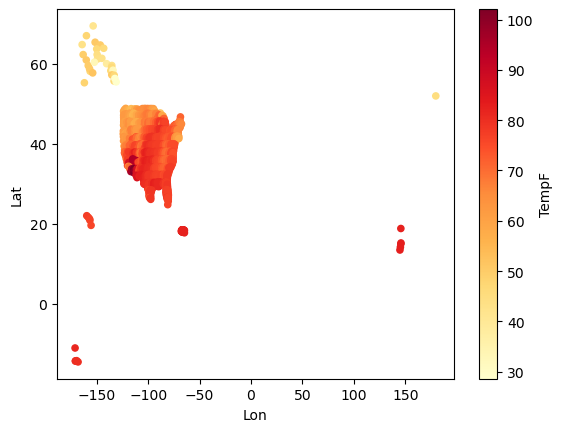

In [45]:

import numpy as np

ctyavtemp62016_df = pd.read_csv("data/CtyAvTemp62016.csv", delimiter=',', skiprows=0, low_memory=False)

# adding TempF column
#convert Kelvin to Fahrenheit
ctyavtemp62016_df['TempF'] = df['TempK'].apply(lambda x: (x - 273.15) * 9/5 + 32)

ctyavtemp62016_df.plot(x="Lon", y="Lat", kind="scatter", c="TempF", colormap="YlOrRd")



Well, that doesn't look very nice. Lets try with geopandas. Geopandas as the name suggests is derived from Pandas and shares a lot of functionality with pandas. But with additional functionality that make it very suitable for working with geographic data with all the power of Pandass. At the center of geopandas is the GeoDataFrame, which behaves much like a pandas dataframe. Lets create a geodataframe from our ctyavtemp62016_df dataframe

In [47]:
import geopandas as gpd
ctyavtemp62016_gpd_df = gpd.GeoDataFrame(ctyavtemp62016_df, geometry=gpd.points_from_xy(ctyavtemp62016_gpd_df['Lon'], ctyavtemp62016_gpd_df['Lat'], crs="EPSG:4326"))
ctyavtemp62016_gpd_df


,OBJECTID_1,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Date_,TempK,TempF,geometry
0,1,2,185,2185,North Slope,69.449343,-153.472830,6/20/2016 0:00,278.599976,41.809956,POINT (-153.47283 69.44934)
1,2,2,188,2188,Northwest Arctic,67.005066,-160.021086,6/20/2016 0:00,281.899994,47.749989,POINT (-160.02109 67.00507)
2,3,2,290,2290,Yukon-Koyukuk,65.375727,-151.577850,6/20/2016 0:00,283.600006,50.810011,POINT (-151.57785 65.37573)
3,4,2,180,2180,Nome,64.783686,-164.188912,6/20/2016 0:00,279.375000,43.205000,POINT (-164.18891 64.78369)
4,5,2,90,2090,Fairbanks North Star,64.676044,-146.548159,6/20/2016 0:00,283.224976,50.134956,POINT (-146.54816 64.67604)
...,...,...,...,...,...,...,...,...,...,...,...
3228,3229,60,40,60040,Swains Island,-11.054436,-171.069014,6/20/2016 0:00,300.750000,81.680000,POINT (-171.06901 -11.05444)
3229,3230,60,10,60010,Eastern,-14.268114,-170.625706,6/20/2016 0:00,300.024994,80.374989,POINT (-170.62571 -14.26811)
3230,3231,60,50,60050,Western,-14.335468,-170.784233,6/20/2016 0:00,300.024994,80.374989,POINT (-170.78423 -14.33547)
3231,3232,60,20,60020,Manu'a,-14.219801,-169.507697,6/20/2016 0:00,299.899994,80.149989,POINT (-169.50770 -14.21980)


You'll notice the `geometry=gpd.points_from_xy(df['Lon'], df['Lat'], crs="EPSG:4326")`. A particular feature of Geodataframes is the geometry column, which programmatically describes geographical data - be they points on a map identified with latitude and longitude, or polygons describing the shapes of counties, states, countries etc. The `geometry` argument is creating the geometry column by taking the `Lon` and `Lat` from each row and creating an entry in the geometry column for that row. `crs` describes the Coordinate Reference System of the geometry we're creating. the crs basically describes how the geometry data should be interpreted when laying out on a display. We don't have to worry about this for this project specifically. TODO: can we give a further reading reference for crs and GIS.

If we try to plot with the geodataframe we have so far as it we will get

<Axes: >

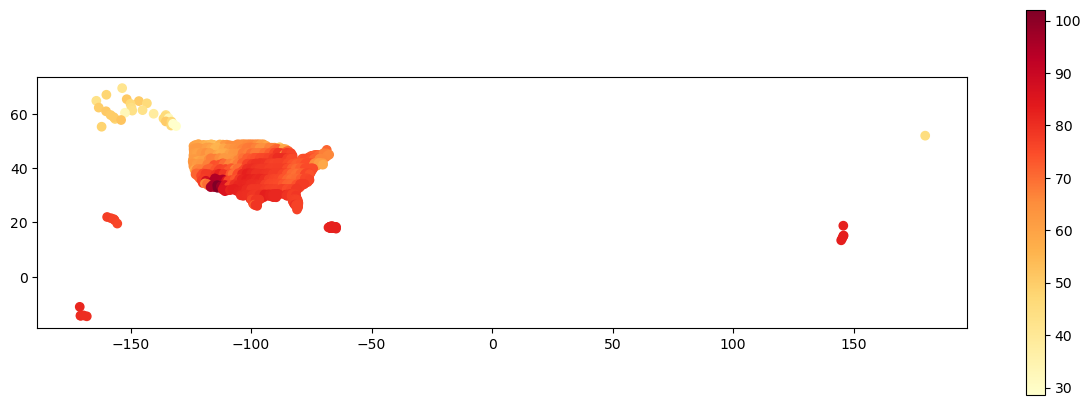

In [49]:
# map the TempF column with geopandas
ctyavtemp62016_gpd_df.plot(column='TempF', cmap='YlOrRd', legend=True, figsize=(15, 5))

That's much better! Not perfect but the dots in the scatter plot are actually being laid out in a more sensible way. But we can do even better if we can get the outlines of the United States and its counties to also show. Geopandas has a powerful feature called `explore` that will create an interactive map So lets do that

In [50]:
# getting a publicly available geopandas geodataframe
uscounties_polygons_gdf = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
uscounties_polygons_gdf["id"] = uscounties_polygons_gdf["id"].astype(str).astype(np.int64)
uscounties_polygons_gdf = uscounties_polygons_gdf.rename(columns={"id":"FIPS_Code"})
uscounties_polygons_gdf

,FIPS_Code,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


<Axes: >

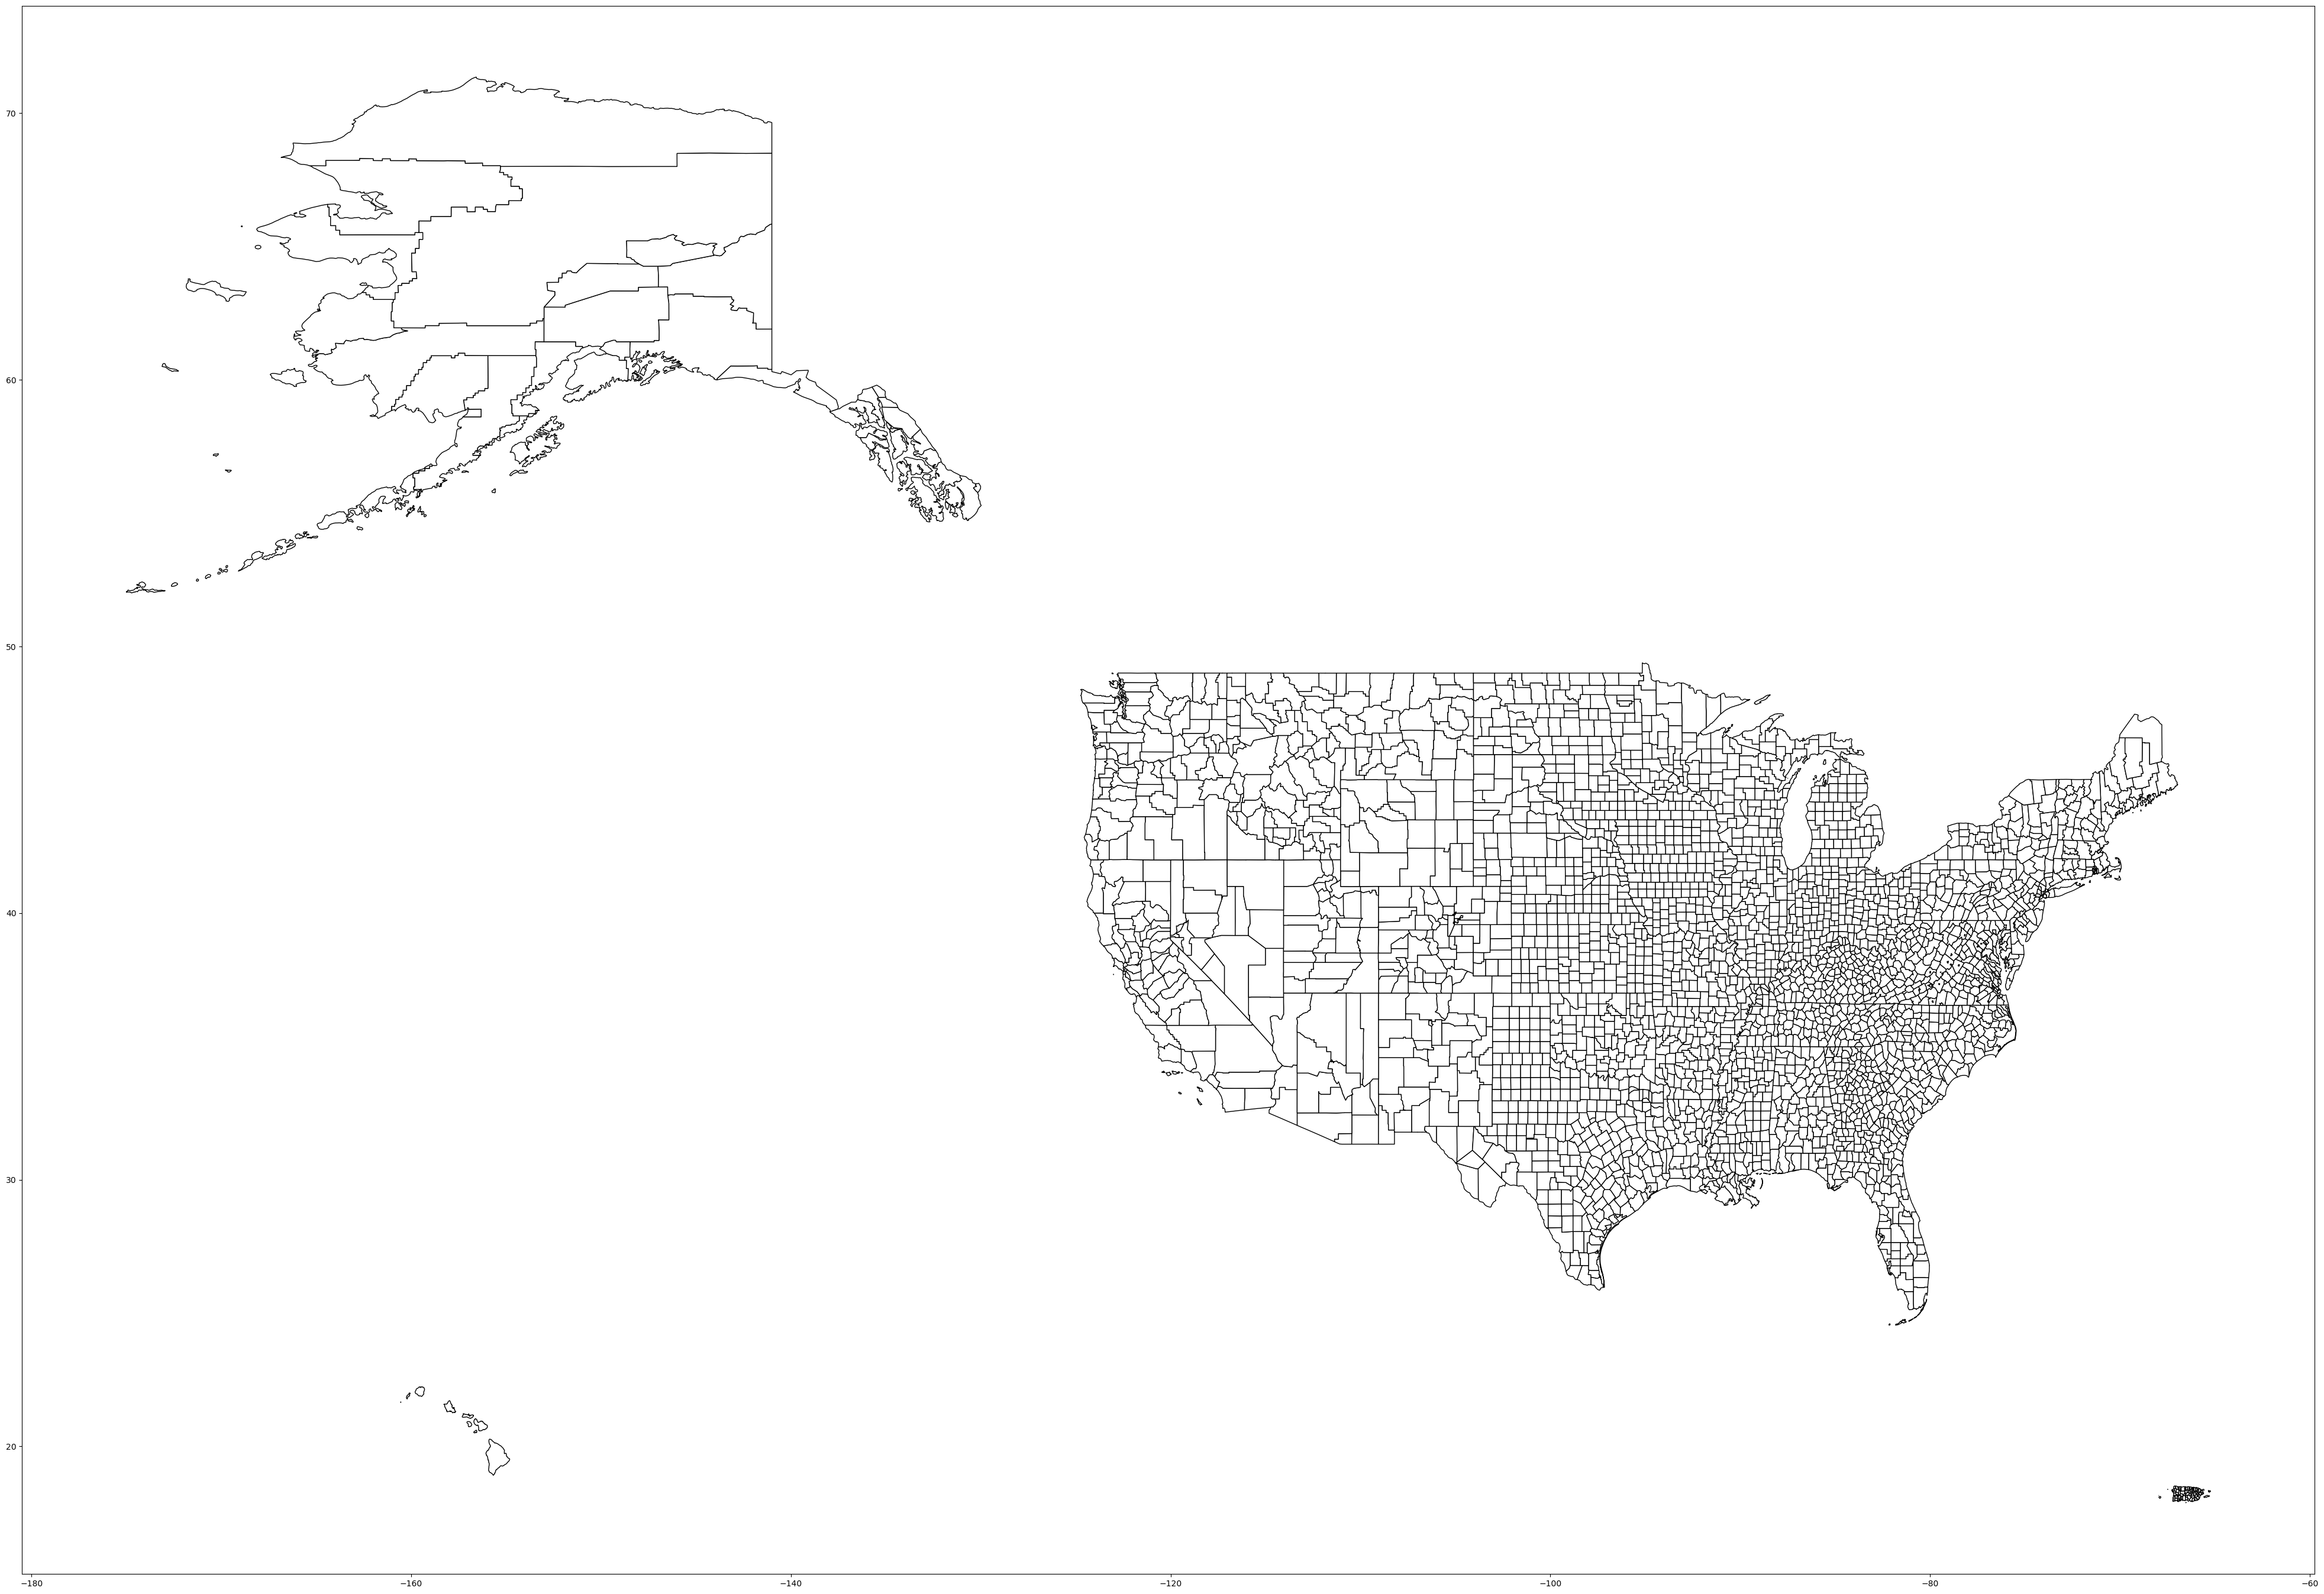

In [58]:
# now if we plot this 
uscounties_polygons_gdf.clip([-175, 0, -40, 75]).plot(color="white", edgecolor="black",figsize=(50,50))

### Miscelleanous Exercise

4. What does the size of the medically vulnerable population look like in those counties? Can visualize that in chart and map?

### Things to think about
1. Given what we saw for many of these power outages and the populations that might be affected, what recommendations would you make for readiness for heatwaves:
    a. for local emergency services
    b. to the county government
    c. to the state and federal government
